# TWITTER PROJECT<a href="#TWITTER-PROJECT" class="anchor-link">¶</a>

## the goal of project :<a href="#the-goal-of-project-:" class="anchor-link">¶</a>

#### Title:<a href="#Title:" class="anchor-link">¶</a>

Sentiment Analysis of Public Opinion on Modi Government's Governance
Promises

#### Description:<a href="#Description:" class="anchor-link">¶</a>

This project is focuses on analyzing public sentiment and opinions
related to the promises made by Prime Minister Narendra Modi

### re:<a href="#re:" class="anchor-link">¶</a>

The "re" module in Python provides regular expression operations.

### nltk:<a href="#nltk:" class="anchor-link">¶</a>

The Natural Language Toolkit (NLTK) is a Python library for working with
human language data

### spacy:<a href="#spacy:" class="anchor-link">¶</a>

It offers efficient tokenization, named entity recognition,
part-of-speech tagging, and dependency parsing.

### string:<a href="#string:" class="anchor-link">¶</a>

The "string" module provides a collection of commonly used string
operations and constants.

### demoji:<a href="#demoji:" class="anchor-link">¶</a>

The demoji library is used for dealing with emojis in text data.

### contractions:<a href="#contractions:" class="anchor-link">¶</a>

The contractions library helps in expanding contractions in English
text. For example, it can convert "don't" to "do not" and "can't" to
"cannot".

### unidecode:<a href="#unidecode:" class="anchor-link">¶</a>

The unidecode library is used for transliterating Unicode characters to
ASCII characters.

### num2words:<a href="#num2words:" class="anchor-link">¶</a>

The num2words library allows you to convert numbers to their textual
representation. For example, it can convert the number 42 to "forty-two"
or 3.14 to "three point one four".

### stopwords (from nltk.corpus):<a href="#stopwords-(from-nltk.corpus):" class="anchor-link">¶</a>

Stopwords are commonly used words that often do not contribute much to
the meaning of a text. The nltk.corpus.stopwords module provides a list
of stopwords in various languages. These stopwords are commonly removed
from text data during preprocessing.

### PorterStemmer (from nltk.stem.porter):<a href="#PorterStemmer-(from-nltk.stem.porter):"
class="anchor-link">¶</a>

PorterStemmer is a stemming algorithm implemented in NLTK. Stemming is
the process of reducing words to their base or root form. The
PorterStemmer algorithm applies a set of rules to remove common word
endings and suffixes.

### SnowballStemmer (from nltk.stem.snowball):<a href="#SnowballStemmer-(from-nltk.stem.snowball):"
class="anchor-link">¶</a>

SnowballStemmer is another stemming algorithm provided by NLTK. It is an
extension of the PorterStemmer and supports stemming in multiple
languages.

### WordNetLemmatizer (from nltk.stem):<a href="#WordNetLemmatizer-(from-nltk.stem):" class="anchor-link">¶</a>

Lemmatization is the process of reducing words to their base or
dictionary form (lemmas). The WordNetLemmatizer in NLTK uses the WordNet
lexical database to perform lemmatization, which ensures that the
resulting lemmas are actual words.

### BeautifulSoup (from bs4):<a href="#BeautifulSoup-(from-bs4):" class="anchor-link">¶</a>

BeautifulSoup is a Python library used for parsing HTML and XML
documents. It provides helpful functions and methods to extract data
from HTML/XML structures and handle web scraping tasks.

In \[313\]:

    import numpy as np
    import pandas as pd
    import pandas as pd
    import numpy as np
    import pandas as pd
    import re
    import nltk
    import spacy
    import string
    import demoji
    import contractions
    import unidecode
    from num2words import num2words
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.stem.snowball import SnowballStemmer
    from nltk.stem import WordNetLemmatizer
    from bs4 import BeautifulSoup

In \[314\]:

    data=pd.read_csv("C:/Users/Leelaramudu/OneDrive/Documents/Twitter_Data.csv")

In \[315\]:

    data.columns

Out\[315\]:

    Index(['clean_text', 'category'], dtype='object')

In \[316\]:

    data.shape

Out\[316\]:

    (162980, 2)

# Data preprocessing<a href="#Data-preprocessing" class="anchor-link">¶</a>

# NULL VALUES CHECKING<a href="#NULL-VALUES-CHECKING" class="anchor-link">¶</a>

In \[317\]:

    data.isna().sum()

Out\[317\]:

    clean_text    4
    category      7
    dtype: int64

In \[318\]:

    data["clean_text"].fillna(data["clean_text"].mode(),inplace=True)

In \[319\]:

    data["category"].fillna(data["category"].median(),inplace=True)

In \[320\]:

    data.isna().sum()

Out\[320\]:

    clean_text    0
    category      0
    dtype: int64

# LOWERCASING<a href="#LOWERCASING" class="anchor-link">¶</a>

In \[128\]:

    df = data.head(5000)

In \[129\]:

    df["lowercase"] = df.clean_text.str.lower()

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\3073074586.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df["lowercase"] = df.clean_text.str.lower()

In \[130\]:

    df.head()

Out\[130\]:

|     | clean_text                                        | category | lowercase                                         |
|-----|---------------------------------------------------|----------|---------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | when modi promised “minimum government maximum... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk all the nonsense and continue all the dra... |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | what did just say vote for modi welcome bjp t...  |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking his supporters prefix chowkidar their n... |
| 4   | answer who among these the most powerful world... | 1.0      | answer who among these the most powerful world... |

checking weather the uppercases are there are not

In \[131\]:

    uppercase = df["clean_text"].str.contains(r'[A-Z]', regex=True).any()

    if uppercase:
        print("The text column contains uppercase letters.")
    else:
        print("The text column does not contain uppercase letters.")

    The text column does not contain uppercase letters.

In \[132\]:

    data_lower=[]
    for i in df['clean_text']:
        for j in i:
            data_lower.append(i)
    len(data_lower)

Out\[132\]:

    612952

# STOPWORD REMOVING<a href="#STOPWORD-REMOVING" class="anchor-link">¶</a>

In \[133\]:

    import nltk
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))
    def remove_stopwords(text):
        return ' '.join([word for word in text.split() if word not in STOPWORDS])
    # Remove stopwords
    df.lowercase = df.lowercase.apply(lambda lowercase: remove_stopwords(lowercase))
    df.head()

    [nltk_data] Downloading package stopwords to
    [nltk_data]     C:\Users\Leelaramudu\AppData\Roaming\nltk_data...
    [nltk_data]   Package stopwords is already up-to-date!
    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\3637690740.py:7: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.lowercase = df.lowercase.apply(lambda lowercase: remove_stopwords(lowercase))

Out\[133\]:

|     | clean_text                                        | category | lowercase                                         |
|-----|---------------------------------------------------|----------|---------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | modi promised “minimum government maximum gove... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk nonsense continue drama vote modi            |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | say vote modi welcome bjp told rahul main camp... |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking supporters prefix chowkidar names modi ... |
| 4   | answer who among these the most powerful world... | 1.0      | answer among powerful world leader today trump... |

In \[134\]:

    data_stop=[]
    for i in df['lowercase']:
        for j in i:
            data_stop.append(i)
    len(data_stop)

Out\[134\]:

    484132

In \[135\]:

    len(data_lower)-len(data_stop)

Out\[135\]:

    128820

# Punctuations<a href="#Punctuations" class="anchor-link">¶</a>

Punctuations are character other than alphaters and digits. These
include \[!"#\$%&\\'()\*+,-./:;\<=\>?@\\\\^\_\`{\|}\~\]maketrans() is a
method that takes three arguments: x, y, and z. In the code snippet, the
first argument x is an empty string, which means no characters are
mapped to any replacement. The second argument y is also an empty
string, indicating that no characters will be removed from the input
string. The third argument z refers to PUNCTUATIONS. It is assumed that
PUNCTUATIONS is a variable or string that contains a set of punctuation
characters that you want to remove from the string. So, maketrans('','',
PUNCTUATIONS) creates a translation table that can be used to remove
punctuation characters from a string.

In \[136\]:

    PUNCTUATIONS = string.punctuation

    def remove_punctuation(text): #The function uses the str.translate() method to remove punctuation marks from the tokens.
        return text.translate(str.maketrans('', '', PUNCTUATIONS))

In \[137\]:

    df.lowercase = df["lowercase"].apply(lambda lowercase: remove_punctuation(lowercase))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\2880439868.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.lowercase = df["lowercase"].apply(lambda lowercase: remove_punctuation(lowercase))

In \[ \]:

    df['stopwords'] = df["stopwords"].apply(lambda text: remove_emoticons(text))

In \[138\]:

    data_punc=[]
    for i in df['lowercase']:
        for j in i:
            data_punc.append(i)
    len(data_punc)

Out\[138\]:

    484123

In \[139\]:

    len(data_stop)-len(data_punc)

Out\[139\]:

    9

# URL and Mention Removal<a href="#URL-and-Mention-Removal" class="anchor-link">¶</a>

In \[140\]:

    df.lowercase = df.lowercase.str.replace(r'https?://\S+|www\.\S+', '', regex=True)
    df.head()

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\3628422568.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.lowercase = df.lowercase.str.replace(r'https?://\S+|www\.\S+', '', regex=True)

Out\[140\]:

|     | clean_text                                        | category | lowercase                                         |
|-----|---------------------------------------------------|----------|---------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | modi promised “minimum government maximum gove... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk nonsense continue drama vote modi            |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | say vote modi welcome bjp told rahul main camp... |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking supporters prefix chowkidar names modi ... |
| 4   | answer who among these the most powerful world... | 1.0      | answer among powerful world leader today trump... |

In \[141\]:

    data_url=[]
    for i in df["lowercase"]:
        for j in i:
            data_url.append(i)
    len(data_url)

Out\[141\]:

    484123

In \[142\]:

    len(data_punc)-len(data_url)

Out\[142\]:

    0

In \[143\]:

    import re
    def remove_mentions(text):
        text_without_mentions = re.sub(r'@\w+', '', text)
        return text_without_mentions

In \[67\]:

    df.lowercase = df["lowercase"].apply(lambda lowercase:  remove_mentions(lowercase))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\1520436354.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.lowercase = df["lowercase"].apply(lambda lowercase:  remove_mentions(lowercase))

In \[144\]:

    data_mentions=[]
    for i in df['lowercase']:
        for j in i:
            data_mentions.append(i)
    len(data_mentions)

Out\[144\]:

    484123

In \[145\]:

    len(data_mentions)-len(data_url)

Out\[145\]:

    0

# Hashtag Handling<a href="#Hashtag-Handling" class="anchor-link">¶</a>

In \[146\]:

    def remove_tags_mentions(tokens):
        pattern = re.compile(r'#\w+')
        return pattern.sub('', tokens)

In \[147\]:

    df.tokens = df["lowercase"].apply(lambda lowercase:  remove_tags_mentions(lowercase))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\2970362486.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
      df.tokens = df["lowercase"].apply(lambda lowercase:  remove_tags_mentions(lowercase))

In \[148\]:

    data_tags=[]
    for i in df['lowercase']:
        for j in i:
            data_tags.append(i)
    len(data_tags)

Out\[148\]:

    484123

In \[149\]:

    len(data_mentions)-len(data_tags)

Out\[149\]:

    0

# Emoticon Handling<a href="#Emoticon-Handling" class="anchor-link">¶</a>

emotion: state of mind or feeling in the form visualization
emoticon:state of feelings in the form of charectors

In \[150\]:

    def remove_emoticons(text):
        emoticon_pattern = r"[:;=]-?[)(|DPOo0/\\]+"
        text = re.sub(emoticon_pattern, "", text)
        return text

In \[151\]:

    df.lowercase = df["lowercase"].apply(lambda lowercase:  remove_emoticons(lowercase))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\1490738594.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.lowercase = df["lowercase"].apply(lambda lowercase:  remove_emoticons(lowercase))

In \[152\]:

    df.head()

Out\[152\]:

|     | clean_text                                        | category | lowercase                                         |
|-----|---------------------------------------------------|----------|---------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | modi promised “minimum government maximum gove... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk nonsense continue drama vote modi            |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | say vote modi welcome bjp told rahul main camp... |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking supporters prefix chowkidar names modi ... |
| 4   | answer who among these the most powerful world... | 1.0      | answer among powerful world leader today trump... |

# Spelling Correction<a href="#Spelling-Correction" class="anchor-link">¶</a>

In \[153\]:

    from spellchecker import SpellChecker

    def correct_spelling(text):
        spell = SpellChecker()
        words = text.split()
        corrected_words = []
        for word in words:
            corrected_word = spell.correction(word)
            if corrected_word is not None:
                corrected_words.append(corrected_word)
        corrected_text = ' '.join(corrected_words)
        return corrected_text

In \[156\]:

    df["spelling_cor"] = df["lowercase"].apply(lambda lowercase:  correct_spelling(lowercase))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\1420473049.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df["spelling_cor"] = df["lowercase"].apply(lambda lowercase:  correct_spelling(lowercase))

In \[193\]:

    data_spelling=[]
    for i in df['spelling_cor']:
        for j in i:
            data_spelling.append(i)
    len(data_spelling)

Out\[193\]:

    448725

In \[194\]:

    len(data_tags)-len(data_spelling)

Out\[194\]:

    35398

# Lemmatization<a href="#Lemmatization" class="anchor-link">¶</a>

Here stemming may not always be actual words but lemmatization produces
valid words that exist in a dictionary So performing only Lemmatization

In \[217\]:

    lemmatizer = WordNetLemmatizer()

    def text_lemmatize(text):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In \[218\]:

    df["lemmatization"] = df["spelling_cor"].apply(lambda spelling_cor:  text_lemmatize(spelling_cor))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\1713589997.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df["lemmatization"] = df["spelling_cor"].apply(lambda spelling_cor:  text_lemmatize(spelling_cor))

In \[219\]:

    data_lemm=[]
    for i in df['lemmatization']:
        for j in i:
            data_lemm.append(i)
    len(data_lemm)

Out\[219\]:

    441353

In \[220\]:

    len(data_spelling)-len(data_lemm)

Out\[220\]:

    7372

# Removing Extra Whitespace<a href="#Removing-Extra-Whitespace" class="anchor-link">¶</a>

In \[221\]:

    def remove_whitespaces(text):
        return " ".join(text.split())

In \[201\]:

    df.lemmatization = df["lemmatization"].apply(lambda lemmatization:  remove_whitespaces(lemmatization))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\3829477247.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.lemmatization = df["lemmatization"].apply(lambda lemmatization:  remove_whitespaces(lemmatization))

In \[222\]:

    data_whitespace=[]
    for i in df['lemmatization']:
        for j in i:
            data_whitespace.append(i)
    len(data_whitespace)

Out\[222\]:

    441353

In \[223\]:

    len(data_lemm)-len(data_whitespace)

Out\[223\]:

    0

# Removing Numeric Digits<a href="#Removing-Numeric-Digits" class="anchor-link">¶</a>

In \[224\]:

    def remove_digits(text):
        pattern = r'\d+'  # Regex pattern to match numeric digits
        without_digits = re.sub(pattern, '', text)
        return without_digits

In \[225\]:

    df["numeric_data"] = df["lemmatization"].apply(lambda lemmatization:   remove_digits(lemmatization))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\1662517023.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df["numeric_data"] = df["lemmatization"].apply(lambda lemmatization:   remove_digits(lemmatization))

In \[226\]:

    data_num=[]
    for i in df["numeric_data"]:
        for j in i:
            data_num.append(i)
    len(data_num)

Out\[226\]:

    438025

In \[227\]:

    len(data_whitespace)-len(data_num)

Out\[227\]:

    3328

In \[228\]:

    df.head()

Out\[228\]:

|     | clean_text                                        | category | lowercase                                         | spelling_cor                                      | lemmatization                                     | numeric_data                                      |
|-----|---------------------------------------------------|----------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | modi promised “minimum government maximum gove... | mode promised minimum government maximum gover... | mode promised minimum government maximum gover... | mode promised minimum government maximum gover... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk nonsense continue drama vote modi            | talk nonsense continue drama vote mode            | talk nonsense continue drama vote mode            | talk nonsense continue drama vote mode            |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | say vote modi welcome bjp told rahul main camp... | say vote mode welcome bop told rahul main camp... | say vote mode welcome bop told rahul main camp... | say vote mode welcome bop told rahul main camp... |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking supporters prefix chowkidar names modi ... | asking supporters prefix names mode great serv... | asking supporter prefix name mode great servic... | asking supporter prefix name mode great servic... |
| 4   | answer who among these the most powerful world... | 1.0      | answer among powerful world leader today trump... | answer among powerful world leader today trump... | answer among powerful world leader today trump... | answer among powerful world leader today trump... |

# Removing HTML Tags<a href="#Removing-HTML-Tags" class="anchor-link">¶</a>

In \[229\]:

    from bs4 import BeautifulSoup

    def remove_html_tags(text):
        soup = BeautifulSoup(text, 'html.parser')
        cleaned_text = soup.get_text()
        return cleaned_text

In \[231\]:

    df.numeric_data = df["numeric_data"].apply(lambda numeric_data:   remove_html_tags(numeric_data))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\2603029881.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.numeric_data = df["numeric_data"].apply(lambda numeric_data:   remove_html_tags(numeric_data))

In \[232\]:

    data_html=[]
    for i in df['numeric_data']:
        for j in i:
            data_html.append(i)
    len(data_html)

Out\[232\]:

    438025

In \[233\]:

    len(data_num)-len(data_html)

Out\[233\]:

    0

# Removing Retweets<a href="#Removing-Retweets" class="anchor-link">¶</a>

In \[234\]:

    def remove_retweets(text):
        cleaned_text = re.sub(r'^RT[\s]+', '', text)
        return cleaned_text

In \[235\]:

    df.numeric_data = df["numeric_data"].apply(lambda numeric_data:   remove_retweets(numeric_data))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\1296988195.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df.numeric_data = df["numeric_data"].apply(lambda numeric_data:   remove_retweets(numeric_data))

In \[236\]:

    data_retweets=[]
    for i in df['numeric_data']:
        for j in i:
            data_retweets.append(i)
    len(data_retweets)

Out\[236\]:

    438025

In \[237\]:

    len(data_html)-len(data_retweets)

Out\[237\]:

    0

# Tokenization<a href="#Tokenization" class="anchor-link">¶</a>

the process of breaking down a text or a sequence of characters into
smaller units called tokens.

In \[250\]:

    from nltk.tokenize import word_tokenize

    text_column = 'numeric_data'
    df['tokens'] = df[text_column].apply(lambda x: word_tokenize(str(x)))

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\4216157413.py:4: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df['tokens'] = df[text_column].apply(lambda x: word_tokenize(str(x)))

In \[251\]:

    df.head()

Out\[251\]:

|     | clean_text                                        | category | lowercase                                         | spelling_cor                                      | lemmatization                                     | numeric_data                                      | duplicates                                        | tokens                                             |
|-----|---------------------------------------------------|----------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|----------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | modi promised “minimum government maximum gove... | mode promised minimum government maximum gover... | mode promised minimum government maximum gover... | mode promised minimum government maximum gover... | maximum get mode difficult state plus business... | \[mode, promised, minimum, government, maximum,... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk nonsense continue drama vote modi            | talk nonsense continue drama vote mode            | talk nonsense continue drama vote mode            | talk nonsense continue drama vote mode            | nonsense vote mode continue drama talk            | \[talk, nonsense, continue, drama, vote, mode\]    |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | say vote modi welcome bjp told rahul main camp... | say vote mode welcome bop told rahul main camp... | say vote mode welcome bop told rahul main camp... | say vote mode welcome bop told rahul main camp... | rahul relax vote mode main bop campaigner say ... | \[say, vote, mode, welcome, bop, told, rahul, m... |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking supporters prefix chowkidar names modi ... | asking supporters prefix names mode great serv... | asking supporter prefix name mode great servic... | asking supporter prefix name mode great servic... | service see abuse crustal coming name prefix s... | \[asking, supporter, prefix, name, mode, great,... |
| 4   | answer who among these the most powerful world... | 1.0      | answer among powerful world leader today trump... | answer among powerful world leader today trump... | answer among powerful world leader today trump... | answer among powerful world leader today trump... | trump today mode among world answer may powerf... | \[answer, among, powerful, world, leader, today... |

# Word Cloud<a href="#Word-Cloud" class="anchor-link">¶</a>

In \[260\]:

    df['tokens']=df['tokens'].astype(str)
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

    wordcloud = WordCloud(background_color='black',  width=1600, height=800, random_state = 42).generate(' '.join(df['tokens']))
    # plot the word cloud  #Word clouds are often created as a visual representation of textual data
    plt.figure(figsize=(20,10), frameon=False)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

    C:\Users\Leelaramudu\AppData\Local\Temp\ipykernel_28612\811806390.py:1: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      df['tokens']=df['tokens'].astype(str)

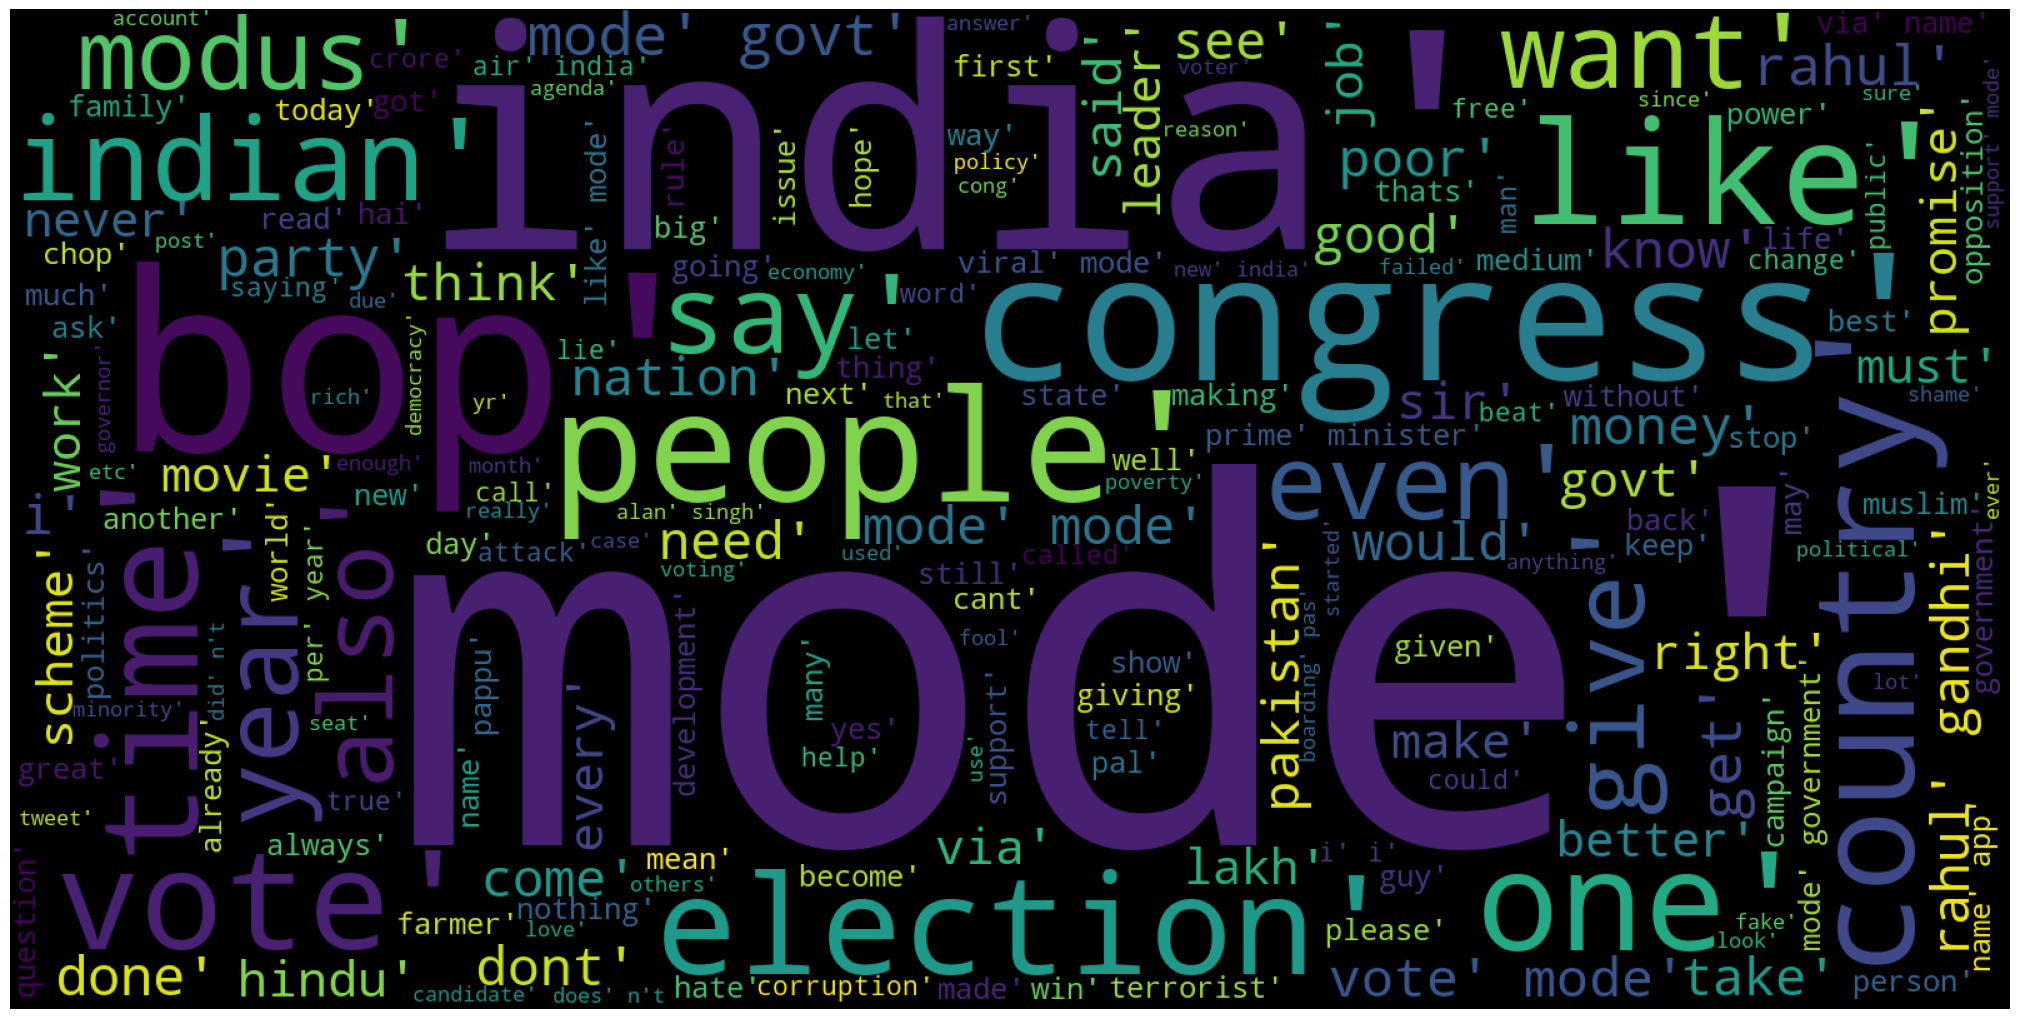

In \[261\]:

    df.head()

Out\[261\]:

|     | clean_text                                        | category | lowercase                                         | spelling_cor                                      | lemmatization                                     | numeric_data                                      | duplicates                                        | tokens                                             |
|-----|---------------------------------------------------|----------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|---------------------------------------------------|----------------------------------------------------|
| 0   | when modi promised “minimum government maximum... | -1.0     | modi promised “minimum government maximum gove... | mode promised minimum government maximum gover... | mode promised minimum government maximum gover... | mode promised minimum government maximum gover... | maximum get mode difficult state plus business... | \['mode', 'promised', 'minimum', 'government', ... |
| 1   | talk all the nonsense and continue all the dra... | 0.0      | talk nonsense continue drama vote modi            | talk nonsense continue drama vote mode            | talk nonsense continue drama vote mode            | talk nonsense continue drama vote mode            | nonsense vote mode continue drama talk            | \['talk', 'nonsense', 'continue', 'drama', 'vot... |
| 2   | what did just say vote for modi welcome bjp t...  | 1.0      | say vote modi welcome bjp told rahul main camp... | say vote mode welcome bop told rahul main camp... | say vote mode welcome bop told rahul main camp... | say vote mode welcome bop told rahul main camp... | rahul relax vote mode main bop campaigner say ... | \['say', 'vote', 'mode', 'welcome', 'bop', 'tol... |
| 3   | asking his supporters prefix chowkidar their n... | 1.0      | asking supporters prefix chowkidar names modi ... | asking supporters prefix names mode great serv... | asking supporter prefix name mode great servic... | asking supporter prefix name mode great servic... | service see abuse crustal coming name prefix s... | \['asking', 'supporter', 'prefix', 'name', 'mod... |
| 4   | answer who among these the most powerful world... | 1.0      | answer among powerful world leader today trump... | answer among powerful world leader today trump... | answer among powerful world leader today trump... | answer among powerful world leader today trump... | trump today mode among world answer may powerf... | \['answer', 'among', 'powerful', 'world', 'lead... |

# TF-IDF Vctorization :<a href="#TF-IDF-Vctorization-:" class="anchor-link">¶</a>

### TF:<a href="#TF:" class="anchor-link">¶</a>

It is calculated by counting the number of times a term appears in a
document and dividing that by the total number of terms in the document.

### IDF:<a href="#IDF:" class="anchor-link">¶</a>

the rarity of a term across the corpus (collection of documents). It is
calculated by taking the logarithm of the total number of documents in
the corpus divided by the number of documents that contain the term.

### TF-IDF = TF \* IDF<a href="#TF-IDF-=-TF-*-IDF" class="anchor-link">¶</a>

In \[311\]:

    from sklearn.feature_extraction.text import TfidfVectorizer

In \[273\]:

    x=df['tokens']
    y=df['category']
    tfidf=TfidfVectorizer(ngram_range=(1,2))
    tfidf.fit(x)
    x_vector=tfidf.transform(x)

ngram_range=(1,2), we consider both unigrams and bigrams. So, the
resulting features would include both the individual words and the pairs
of consecutive words capture not only the individual words but also some
context and relationship between neighboring words. "The quick brown fox
jumps over the lazy dog." Unigrams (1-grams): \["The", "quick", "brown",
"fox", "jumps", "over", "the", "lazy", "dog"\] Bigrams (2-grams): \["The
quick", "quick brown", "brown fox", "fox jumps", "jumps over", "over
the", "the lazy", "lazy dog"\]

In \[293\]:

    tfidf.get_feature_names()

Out\[293\]:

    ['ab',
     'ab ape',
     'ab going',
     'ab government',
     'ab govt',
     'ab is',
     'ab name',
     'ab well',
     'abandoned',
     'abandoned ask',
     'abandoned lead',
     'abandoning',
     'abandoning number',
     'abbreviation',
     'abbreviation focus',
     'abdicating',
     'abdicating responsibility',
     'abdication',
     'abdication duty',
     'abducted',
     'abducted converted',
     'abduction',
     'abduction conversion',
     'abduction gangrene',
     'abduction girl',
     'abdul',
     'abdul salam',
     'abdullah',
     'abdullah didi',
     'abdullah family',
     'abe',
     'abe biryani',
     'abe desk',
     'abe donald',
     'abe made',
     'abed',
     'abed gon',
     'abhor',
     'abhor papa',
     'abi',
     'abi bear',
     'abi captive',
     'ability',
     'ability his',
     'ability make',
     'ability mode',
     'ability passing',
     'ability salesmanship',
     'abject',
     'abject fear',
     'able',
     'able action',
     'able administrator',
     'able announce',
     'able anything',
     'able bring',
     'able capable',
     'able complete',
     'able connect',
     'able convince',
     'able create',
     'able cross',
     'able find',
     'able last',
     'able leadership',
     'able manage',
     'able modify',
     'able motivate',
     'able operate',
     'able past',
     'able raise',
     'able realise',
     'able sell',
     'able tweet',
     'able understand',
     'able vote',
     'able well',
     'aboard',
     'aboard rejected',
     'abolish',
     'abolish art',
     'abolish every',
     'abolish poor',
     'abolish subsidy',
     'abolished',
     'abolished ram',
     'abolished triple',
     'aboot',
     'aboot mode',
     'abot',
     'abot sing',
     'abroad',
     'abroad etc',
     'abroad firmly',
     'abroad instead',
     'abroad persecution',
     'abroad still',
     'abroad wont',
     'absconded',
     'absconded given',
     'absconded modus',
     'absence',
     'absence common',
     'absent',
     'absent welcome',
     'absolute',
     'absolute hate',
     'absolute judgement',
     'absolute majority',
     'absolute minimum',
     'absolute poverty',
     'absolute power',
     'absolute truth',
     'absolutely',
     'absolutely dodgy',
     'absolutely fresh',
     'absolutely impractical',
     'absolutely joker',
     'absolutely mode',
     'absolutely right',
     'absolutely spot',
     'absolutely true',
     'absolutely unacceptable',
     'absolved',
     'absolved godhead',
     'abstain',
     'abstain voting',
     'absurd',
     'absurd idea',
     'abt',
     'abt chart',
     'abt country',
     'abt democracy',
     'abt development',
     'abt ideology',
     'abt min',
     'abt mode',
     'abt moral',
     'abt name',
     'abt opposing',
     'abt pa',
     'abt pagoda',
     'abt politics',
     'abt poverty',
     'abt progress',
     'abt raise',
     'abt religion',
     'abt rex',
     'abt son',
     'abt wife',
     'abundance',
     'abundance mode',
     'abundantly',
     'abundantly clear',
     'abuse',
     'abuse call',
     'abuse coming',
     'abuse diff',
     'abuse directed',
     'abuse father',
     'abuse game',
     'abuse hurled',
     'abuse like',
     'abuse made',
     'abuse mode',
     'abuse people',
     'abuse power',
     'abuse rival',
     'abuse shout',
     'abuse simplicity',
     'abuse slur',
     'abuse target',
     'abuse woman',
     'abused',
     'abused except',
     'abused never',
     'abused rahul',
     'abused singular',
     'abused threatened',
     'abused totally',
     'abused trolled',
     'abuser',
     'abuser targeting',
     'abuser troll',
     'abusing',
     'abusing criticising',
     'abusing hindu',
     'abusing last',
     'abusing mode',
     'abusing openly',
     'abusing opposition',
     'abusing rahul',
     'abusing sharing',
     'abusing sitting',
     'abusing victory',
     'abusive',
     'abusive language',
     'abusive remark',
     'abuzz',
     'abuzz news',
     'abysmal',
     'abysmal state',
     'academic',
     'academic columnist',
     'academic exercise',
     'academic name',
     'accent',
     'accent debate',
     'accent que',
     'accept',
     'accept apology',
     'accept bakari',
     'accept decision',
     'accept defeat',
     'accept failure',
     'accept job',
     'accept lying',
     'accept mode',
     'accept scheme',
     'accept wrong',
     'acceptable',
     'acceptable corrupt',
     'acceptance',
     'acceptance mode',
     'accepted',
     'accepted congress',
     'accepted defeat',
     'accepted group',
     'accepted lick',
     'accepted minor',
     'accepting',
     'accepting fact',
     'accepting mode',
     'accepts',
     'accepts might',
     'accepts mode',
     'access',
     'access bank',
     'access electricity',
     'access toilet',
     'accessible',
     'accessible indian',
     'accessible poor',
     'accident',
     'accident insurance',
     'accident last',
     'accident mistake',
     'accidental',
     'accidental ineligible',
     'accidental mode',
     'accidentally',
     'accidentally classroom',
     'accolade',
     'accolade giving',
     'accommodate',
     'accommodate well',
     'accomplish',
     'accomplish officially',
     'accomplishment',
     'accomplishment congress',
     'accordance',
     'accordance market',
     'according',
     'according arrogant',
     'according bop',
     'according committee',
     'according consensus',
     'according indian',
     'according law',
     'according logic',
     'according mode',
     'according nomination',
     'according public',
     'according rahul',
     'according taste',
     'according trump',
     'according warning',
     'according work',
     'according yogi',
     'account',
     'account accessible',
     'account actually',
     'account ask',
     'account attending',
     'account belongs',
     'account beneficiary',
     'account black',
     'account citizen',
     'account comment',
     'account congress',
     'account corny',
     'account created',
     'account credited',
     'account crore',
     'account deal',
     'account directly',
     'account election',
     'account every',
     'account everyone',
     'account fight',
     'account first',
     'account get',
     'account inc',
     'account indian',
     'account le',
     'account least',
     'account loan',
     'account made',
     'account mode',
     'account need',
     'account never',
     'account new',
     'account ocr',
     'account open',
     'account opened',
     'account pocket',
     'account polished',
     'account poor',
     'account promise',
     'account promised',
     'account rahul',
     'account ran',
     'account read',
     'account reality',
     'account reserved',
     'account rest',
     'account said',
     'account song',
     'account spreading',
     'account stolen',
     'account talking',
     'account tax',
     'account thief',
     'account think',
     'account wah',
     'accountability',
     'accountability nation',
     'accountability never',
     'accountable',
     'accountable hate',
     'accountable least',
     'accountable take',
     'accountant',
     'accountant well',
     'accounted',
     'accounted parliament',
     'accumulation',
     'accumulation shame',
     'accuracy',
     'accuracy judgement',
     'accurately',
     'accurately capture',
     'accusation',
     'accusation allegation',
     'accusation stop',
     'accuse',
     'accuse din',
     'accused',
     'accused bigger',
     'accused crore',
     'accused get',
     'accused killing',
     'accused maker',
     'accused mode',
     'accused sexual',
     'accused sexually',
     'accused succeeding',
     'accused viral',
     'accuses',
     'accuses biopic',
     'accuses bop',
     'accuses filmmaker',
     'accuses maker',
     'accuses mode',
     'accusing',
     'accusing bop',
     'accusing political',
     'accusing raga',
     'ache',
     'ache din',
     'ache kira',
     'ache mode',
     'ache mona',
     'ache scheme',
     'achieve',
     'achieve rahul',
     'achieved',
     'achieved corrupt',
     'achieved employment',
     'achieved huge',
     'achieved many',
     'achieved mechanism',
     'achieved nothing',
     'achieved round',
     'achievement',
     'achievement accomplishment',
     'achievement always',
     'achievement bantam',
     'achievement cloud',
     'achievement dont',
     'achievement government',
     'achievement hand',
     'achievement however',
     'achievement indian',
     'achievement mode',
     'achievement muslim',
     'achievement serious',
     'achievement thanks',
     'achievement unlike',
     'achievement year',
     'achieving',
     'achieving put',
     'achieving wish',
     'acid',
     'acid still',
     'ack',
     'ack banned',
     'acknowledge',
     'acknowledge every',
     'acknowledged',
     'acknowledged israel',
     'acquired',
     'acquired chop',
     'acquittal',
     'acquittal people',
     'acre',
     'acre ari',
     'acre land',
     'across',
     'across aisle',
     'across country',
     'across globe',
     'across india',
     'across many',
     'across say',
     'across since',
     'across told',
     'across urban',
     'across world',
     'act',
     'act account',
     'act also',
     'act always',
     'act become',
     'act blame',
     'act congress',
     'act dani',
     'act exactly',
     'act freebie',
     'act hindu',
     'act incident',
     'act jew',
     'act like',
     'act lunch',
     'act make',
     'act modus',
     'act please',
     'act protect',
     'act put',
     'act say',
     'act strongly',
     'act suddenly',
     'act thats',
     'act ticket',
     'act transfer',
     'act visit',
     'acted',
     'acted black',
     'acted median',
     'acted mode',
     'acting',
     'acting ironic',
     'acting like',
     'acting mode',
     'acting please',
     'acting strong',
     'acting talent',
     'acting tough',
     'acting wisely',
     'action',
     'action alan',
     'action alliance',
     'action already',
     'action angst',
     'action brutality',
     'action come',
     'action even',
     'action example',
     'action film',
     'action gain',
     'action get',
     'action ground',
     'action lia',
     'action love',
     'action mob',
     'action mode',
     'action muslim',
     'action nearly',
     'action news',
     'action none',
     'action onward',
     'action perpetrator',
     'action plan',
     'action rat',
     'action recovery',
     'action say',
     'action statement',
     'action taken',
     'action telugu',
     'action thank',
     'action threat',
     'action unlike',
     'action within',
     'action yet',
     'active',
     'active support',
     'active using',
     'active working',
     'activist',
     'activist commentator',
     'activist made',
     'activist pseudo',
     'activist state',
     'activity',
     'activity asked',
     'activity etc',
     'activity failed',
     'activity focusing',
     'activity need',
     'activity sir',
     'activity whole',
     'actor',
     'actor cricketer',
     'actor even',
     'actor give',
     'actor great',
     'actor he',
     'actor land',
     'actor made',
     'actor really',
     'actor reply',
     'actor right',
     'actor shaman',
     'actor slow',
     'actor willing',
     'actress',
     'actress deepak',
     'actual',
     'actual democratic',
     'actual development',
     'actual merit',
     'actual single',
     'actual temperature',
     'actually',
     'actually announcement',
     'actually are',
     'actually beat',
     'actually belong',
     'actually biggest',
     'actually bring',
     'actually congress',
     'actually done',
     'actually dont',
     'actually friendly',
     'actually give',
     'actually he',
     'actually healthy',
     'actually kind',
     'actually know',
     'actually like',
     'actually look',
     'actually mode',
     'actually modus',
     'actually pay',
     'actually praising',
     'actually pro',
     'actually promoted',
     'actually public',
     'actually pursuing',
     'actually reach',
     'actually reclaiming',
     'actually reflects',
     'actually running',
     'actually scared',
     'actually sold',
     'actually touch',
     'actually work',
     'actually worried',
     'actually would',
     'ad',
     'ad admit',
     'ad copy',
     'ad crush',
     'ad didn',
     'ad election',
     'ad la',
     'ad lead',
     'ad survived',
     'ad tell',
     'adam',
     'adamant',
     'adamant decision',
     'adamant hold',
     'adapt',
     'adapt anders',
     'add',
     'add additional',
     'add another',
     'add fuel',
     'add lashing',
     'add mode',
     'add oil',
     'add otherwise',
     'add paisa',
     'add prefix',
     'add remaining',
     'add strength',
     'added',
     'added bonus',
     'added daily',
     'added historic',
     'added husband',
     'added kneading',
     'added labour',
     'added mode',
     'added mumbai',
     'added name',
     'added yet',
     'adderall',
     'adderall paisa',
     'addicted',
     'addicted minimum',
     'addicted opium',
     'addiction',
     'addiction asked',
     'addiction measure',
     'addition',
     'addition already',
     'addition helpful',
     'addition name',
     'additional',
     'additional challenge',
     'additional farmer',
     'additional income',
     'additional support',
     'address',
     'address election',
     'address interest',
     'address issue',
     'address james',
     'address lakh',
     'address mai',
     'address medium',
     'address meeting',
     'address opening',
     'address rally',
     'address resolve',
     'address suru',
     'address two',
     'address world',
     'addressed',
     'addressed implemented',
     'addressed make',
     'addressed nation',
     'addressed oil',
     'addressed tweet',
     'addressed urgent',
     'addressing',
     'addressing mode',
     'addressing party',
     'addressing rally',
     'addressing shakti',
     'adjacent',
     'adjacent side',
     'adjective',
     'adjective bow',
     'adjust',
     'adjust muslim',
     'administration',
     'administration bop',
     'administration holding',
     'administration indian',
     'administration maintain',
     'administration topped',
     'administrative',
     'administrative division',
     'administrator',
     'administrator let',
     'administrator like',
     'administrator person',
     'admiral',
     'admiral replaced',
     'admire',
     'admire candid',
     'admire mode',
     'admit',
     'admit chief',
     'admit leader',
     'admit mode',
     'admit nonsense',
     'admit private',
     'admit stabbing',
     'admits',
     'admits abt',
     'admitted',
     'admitted hospital',
     'admitted icu',
     'admitting',
     'admitting accepting',
     'adolf',
     'adolf hitler',
     'adonis',
     'adonis armband',
     'adonis blossoming',
     'adonis mallard',
     'adonis viral',
     'adonis witnessing',
     'adopt',
     'adopt bold',
     'adopt one',
     'adopted',
     'adopted banana',
     'adore',
     'adore way',
     'adout',
     'adout scam',
     'advance',
     'advance along',
     'advance child',
     'advance country',
     'advance delhi',
     'advance deserved',
     'advance like',
     'advance mass',
     'advance mode',
     'advance one',
     'advance seat',
     'advance trying',
     'advanced',
     'advanced chopper',
     'advantage',
     'advantage bop',
     'advantage congress',
     'advantage mode',
     'advantage opposition',
     'advantage reason',
     'advantage tail',
     'advent',
     'advent dictatorship',
     'adventure',
     'adventure mode',
     'adverse',
     'adverse affect',
     'advertisement',
     'advertisement band',
     'advertisement shown',
     'advertisement tat',
     'advertisement third',
     'advertisement would',
     'advertising',
     'advertising campaign',
     'advertising excellent',
     'advertising excessive',
     'advertising full',
     'advertising impact',
     'advertising telling',
     'advice',
     'advice may',
     'advice mode',
     'advice refrain',
     'advise',
     'advise blind',
     'advise rahul',
     'advised',
     'advised electorate',
     'adviser',
     'adviser around',
     'adviser even',
     'advisor',
     'advisor aryan',
     'advisor strongly',
     'advocate',
     'advocate cant',
     'advocate cow',
     'afar',
     'afar directing',
     'afar mandar',
     'affair',
     'affair set',
     'affect',
     'affect anyways',
     'affect movie',
     'affect state',
     'affected',
     'affected charge',
     'affected jai',
     'affected via',
     'affecting',
     'affecting coalition',
     'affidavit',
     'affidavit say',
     'affidavit smite',
     'affiliation',
     'affiliation president',
     'affirmative',
     'affirmative action',
     'affliction',
     'affliction far',
     'afford',
     'afford cambridge',
     'afford dynasty',
     'afford gap',
     'afford miss',
     'afford purchase',
     'afford scheme',
     'affordable',
     'affront',
     'affront thing',
     'afghan',
     'afghan love',
     'afraid',
     'afraid ask',
     'afraid come',
     'afraid contest',
     'afraid countering',
     'afraid coward',
     'afraid fight',
     'afraid havent',
     'afraid mode',
     'afraid modify',
     'afraid modus',
     'afraid survival',
     'afraid vendetta',
     'afresh',
     'afresh one',
     'after',
     'after jobless',
     'after trying',
     'again',
     'again grand',
     'again park',
     'again probably',
     'against',
     'against mode',
     'against modicum',
     'against muslim',
     'against send',
     'agar',
     'agar constipation',
     'agar development',
     'agar election',
     'agar hi',
     'agar hole',
     'agar inlay',
     'agar katrina',
     'agar logo',
     'agar majeure',
     'agar mode',
     'agar much',
     'agar rahul',
     'agar woh',
     'age',
     'age bad',
     'age banana',
     'age due',
     'age got',
     'age kindest',
     'age limit',
     'age napkin',
     'age surely',
     'age taken',
     'age thats',
     'agency',
     'agency head',
     'agency isn',
     'agency must',
     'agency send',
     'agency worker',
     'agenda',
     'agenda bop',
     'agenda building',
     'agenda cant',
     'agenda changed',
     'agenda clean',
     'agenda concern',
     'agenda condemning',
     'agenda cong',
     'agenda corruption',
     'agenda counter',
     'agenda defeat',
     'agenda destroy',
     'agenda education',
     'agenda election',
     'agenda etc',
     'agenda fight',
     'agenda hand',
     'agenda health',
     'agenda may',
     'agenda mode',
     'agenda new',
     'agenda people',
     'agenda perception',
     'agenda remove',
     'agenda represent',
     'agenda solve',
     'agenda stop',
     'agenda unlike',
     'agenda via',
     'agenda vision',
     'agenda wish',
     'agenda work',
     'agent',
     'agent debt',
     'agent development',
     'agent like',
     'agent secure',
     'agent shameless',
     'agent wi',
     'aggregate',
     'aggregate considered',
     'aggression',
     'aggression bop',
     'aggression conventional',
     'aggressive',
     'aggressive drive',
     'aggressive people',
     'agitated',
     'agitated farmer',
     'ago',
     'ago beat',
     'ago beloved',
     'ago mode',
     'ago people',
     'ago started',
     'ago vote',
     'ago would',
     'ago year',
     'ago youth',
     'agony',
     'agony pain',
     'agra',
     'agra via',
     'agrarian',
     'agrarian crisis',
     'agree',
     'agree age',
     'agree agree',
     'agree also',
     'agree anytime',
     'agree arun',
     'agree bartender',
     'agree bop',
     'agree congress',
     'agree critical',
     'agree decision',
     'agree disagree',
     'agree dont',
     'agree doubt',
     'agree everything',
     'agree far',
     'agree fault',
     'agree governor',
     'agree hair',
     'agree idea',
     'agree idiot',
     'agree map',
     'agree mode',
     'agree nobody',
     'agree opinion',
     'agree option',
     'agree politician',
     'agree profit',
     'agree say',
     'agree tenure',
     'agree time',
     'agree unrequited',
     'agree way',
     'agree whatever',
     'agree word',
     'agreed',
     'agreed cong',
     'agreed congress',
     'agreed india',
     'agreed there',
     'agreed tracked',
     'agreed without',
     'agreement',
     'agrees',
     'agrees accepts',
     'agrees congress',
     'agricultural',
     'agricultural produce',
     'agriculture',
     'agriculture loan',
     'aha',
     'aha alwa',
     'aha dhe',
     'aha hai',
     'aha know',
     'aha pak',
     ...]

# LABEL ENCODING<a href="#LABEL-ENCODING" class="anchor-link">¶</a>

In \[294\]:

    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    le.fit(y)
    y=le.transform(y)

In \[298\]:

    df["category"].unique()

Out\[298\]:

    array([-1.,  0.,  1.])

Label encoding will be done for y variable that becouse here i have 3
different categories that is -1,0,1 so i converted them into 0,1,2 this
could be done only for a better understanding of confusion matrix

# Splitting dataset into training and testing<a href="#Splitting-dataset-into-training-and-testing"
class="anchor-link">¶</a>

In \[299\]:

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_vector, y, test_size=0.2, random_state=42)
    # test_size=0.2 specifies that 20% of the dataset should be reserved for testing, and
    # the remaining 80% will be used for training.
    # random_state=42 sets the random seed for the random number
    # generator used by the function, which ensures that the random splitting of the dataset will be reproducible.
    # X_train - the input features for the training set
    # X_test - the input features for the testing set
    # y_train - the target variable for the training set
    # y_test - the target variable for the testing set

In \[300\]:

    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    (4000, 55164) (1000, 55164) (4000,) (1000,)

# MODEL BUILDING : RANDOM FOREST<a href="#MODEL-BUILDING-:-RANDOM-FOREST" class="anchor-link">¶</a>

In \[312\]:

    from sklearn.ensemble import RandomForestClassifier
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In \[302\]:

    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

In \[303\]:

    print(classification_report(y_test,y_pred))
    print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, y_pred)))
    print("Precision of Random Forest: "+ str(precision_score(y_test, y_pred, average='weighted')))
    print("Recall of Random Forest: "+ str(recall_score(y_test, y_pred, average='weighted')))
    print("Average F1 of Random Forest: "+ str(f1_score(y_test, y_pred, average='weighted')))
    print("F1 of Random Forest for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
    rf_f1=f1_score(y_test, y_pred, average=None)

                  precision    recall  f1-score   support

               0       0.87      0.25      0.38       216
               1       0.66      0.86      0.75       376
               2       0.69      0.75      0.72       408

        accuracy                           0.69      1000
       macro avg       0.74      0.62      0.62      1000
    weighted avg       0.72      0.69      0.66      1000

    Accuracy of Random Forest: 0.685
    Precision of Random Forest: 0.7161678177072429
    Recall of Random Forest: 0.685
    Average F1 of Random Forest: 0.657270646982919
    F1 of Random Forest for each type of attack: [0.38267148 0.7482679  0.71878646]

In \[304\]:

    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Assume you have true labels (y_true) and predicted labels (y_pred)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

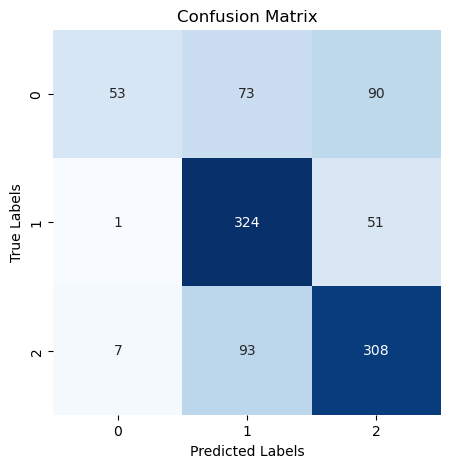

# ADABOOST CLASSIFIER<a href="#ADABOOST-CLASSIFIER" class="anchor-link">¶</a>

In \[308\]:

    from sklearn.ensemble import AdaBoostClassifier

    adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

    adaboost.fit(X_train, y_train)

    y_pred = adaboost.predict(X_test)

In \[309\]:

    print(classification_report(y_test,y_pred))
    print("Accuracy of Random Forest: "+ str(accuracy_score(y_test, y_pred)))
    print("Precision of Random Forest: "+ str(precision_score(y_test, y_pred, average='weighted')))
    print("Recall of Random Forest: "+ str(recall_score(y_test, y_pred, average='weighted')))
    print("Average F1 of Random Forest: "+ str(f1_score(y_test, y_pred, average='weighted')))
    print("F1 of Random Forest for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
    rf_f1=f1_score(y_test, y_pred, average=None)

                  precision    recall  f1-score   support

               0       0.78      0.50      0.61       216
               1       0.64      0.95      0.77       376
               2       0.85      0.63      0.72       408

        accuracy                           0.72      1000
       macro avg       0.76      0.69      0.70      1000
    weighted avg       0.76      0.72      0.71      1000

    Accuracy of Random Forest: 0.722
    Precision of Random Forest: 0.7551682252936066
    Recall of Random Forest: 0.722
    Average F1 of Random Forest: 0.713285424363475
    F1 of Random Forest for each type of attack: [0.60623229 0.76627535 0.72112676]

In \[310\]:

    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Assume you have true labels (y_true) and predicted labels (y_pred)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

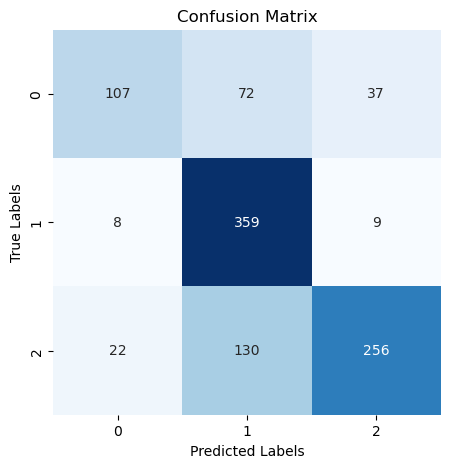

In \[ \]:

     

In \[ \]: